<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
from commpy.modulation import QAMModem
from commpy.utilities  import signal_power
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

In [2]:
from scipy import special as sp

def Qfunc(x):
    return 0.5-0.5*sp.erf(x/np.sqrt(2))

def theoryBER(M, EbN0, constType):
    
    EbN0lin = 10**(EbN0/10)        
    k  = np.log2(M) 
    
    if constType == 'qam':
        L  = np.sqrt(M)      
        Pb = 2*(1-1/L)/np.log2(L)*Qfunc(np.sqrt(3*np.log2(L)/(L**2-1)*(2*EbN0lin)))
        
    elif constType == 'psk':
        Ps = 2*Qfunc(np.sqrt(2*k*EbN0lin)*np.sin(np.pi/M))
        Pb = Ps/k
    
    return Pb  

In [3]:
# Run BER vs Ebn0 Monte Carlo simulation 

M  = 256  # Modulation order

EbN0dB_    = np.arange(1,15,0.5)+10
BER        = np.zeros(EbN0dB_.shape)
EbN0dB_est = np.zeros(EbN0dB_.shape)

for indSNR in range(EbN0dB_.size):
    
    EbN0dB = EbN0dB_[indSNR]
    
    # generate random bits
    bitsTx   = np.random.randint(2, size=3*2**18)    

    # Map bits to constellation symbols
    mod = QAMModem(m=M)
    symbTx = mod.modulate(bitsTx)
        
    # Normalize symbols energy to 1
    symbTx = symbTx/np.sqrt(mod.Es)

    # AWGN    
    snrdB    = EbN0dB + 10*np.log10(np.log2(M))
    noiseVar = 1/(10**(snrdB/10))

    σ        = np.sqrt(noiseVar)
    noise    = np.random.normal(0,σ, symbTx.size) + 1j*np.random.normal(0,σ, symbTx.size)
    noise    = 1/np.sqrt(2)*noise    

    symbRx = symbTx + noise
              
    # Demodulate received symbols        
    bitsRx = mod.demodulate(np.sqrt(mod.Es)*symbRx, demod_type = 'hard')    

    # BER calculation, EbN0 estimation
    ERR = np.logical_xor(bitsRx, bitsTx)
    BER[indSNR] = ERR.sum()/ERR.size
    EbN0dB_est[indSNR] = 10*np.log10(1/(signal_power(symbRx-symbTx)*np.log2(M)))
    print('EbN0: %3.2f dB, EbN0_est: %3.2f dB, BER: %3.1e ' %(EbN0dB, EbN0dB_est[indSNR], BER[indSNR]))    

print('Total of bits counted: ', ERR.size)

EbN0: 11.00 dB, EbN0_est: 11.00 dB, BER: 6.5e-02 
EbN0: 11.50 dB, EbN0_est: 11.50 dB, BER: 5.8e-02 
EbN0: 12.00 dB, EbN0_est: 11.99 dB, BER: 5.2e-02 
EbN0: 12.50 dB, EbN0_est: 12.48 dB, BER: 4.6e-02 
EbN0: 13.00 dB, EbN0_est: 13.02 dB, BER: 4.0e-02 
EbN0: 13.50 dB, EbN0_est: 13.47 dB, BER: 3.5e-02 
EbN0: 14.00 dB, EbN0_est: 13.99 dB, BER: 2.9e-02 
EbN0: 14.50 dB, EbN0_est: 14.50 dB, BER: 2.4e-02 
EbN0: 15.00 dB, EbN0_est: 14.98 dB, BER: 2.0e-02 
EbN0: 15.50 dB, EbN0_est: 15.50 dB, BER: 1.6e-02 
EbN0: 16.00 dB, EbN0_est: 16.01 dB, BER: 1.2e-02 
EbN0: 16.50 dB, EbN0_est: 16.52 dB, BER: 9.4e-03 
EbN0: 17.00 dB, EbN0_est: 17.00 dB, BER: 7.1e-03 
EbN0: 17.50 dB, EbN0_est: 17.52 dB, BER: 4.9e-03 
EbN0: 18.00 dB, EbN0_est: 17.99 dB, BER: 3.5e-03 
EbN0: 18.50 dB, EbN0_est: 18.51 dB, BER: 2.3e-03 
EbN0: 19.00 dB, EbN0_est: 19.00 dB, BER: 1.4e-03 
EbN0: 19.50 dB, EbN0_est: 19.51 dB, BER: 8.7e-04 
EbN0: 20.00 dB, EbN0_est: 20.02 dB, BER: 4.7e-04 
EbN0: 20.50 dB, EbN0_est: 20.50 dB, BER: 2.6e-04 


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


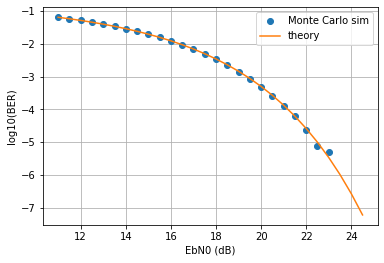

In [4]:
# Plot simulation results and theoretical curves        
BERtheory = theoryBER(M, EbN0dB_,'qam')   

plt.plot(EbN0dB_,np.log10(BER),'o', label='Monte Carlo sim');
plt.plot(EbN0dB_, np.log10(BERtheory), label = 'theory')
plt.legend();
plt.xlabel('EbN0 [dB]');
plt.ylabel('log10(BER)');
plt.grid()

In [5]:
help(QAMModem)

Help on class QAMModem in module commpy.modulation:

class QAMModem(Modem)
 |  QAMModem(m)
 |  
 |  Creates a Quadrature Amplitude Modulation (QAM) Modem object.
 |  
 |  Parameters
 |  ----------
 |  m : int
 |      Size of the PSK constellation.
 |  
 |  Attributes
 |  ----------
 |  constellation : 1D-ndarray of complex
 |                  Modem constellation. If changed, the length of the new constellation must be a power of 2.
 |  
 |  Es            : float
 |                  Average energy per symbols.
 |  
 |  m             : integer
 |                  Constellation length.
 |  
 |  num_bits_symb : integer
 |                  Number of bits per symbol.
 |  
 |  Raises
 |  ------
 |  ValueError
 |                  If the constellation is changed to an array-like with length that is not a power of 2.
 |                  If the parameter m would lead to an non-square QAM during initialization.
 |  
 |  Method resolution order:
 |      QAMModem
 |      Modem
 |      builtins.objec